# COVID-19 Studies - Air Quality - Stanley Tran

In [1]:
import numpy as np
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt

In [2]:
#Air Quality Data: https://aqicn.org/data-platform/covid19/verify/525842af-a96a-48c1-a014-103e81e29812

In [3]:
Air_Quality_Data = pd.read_csv("D:/Covid 19 Data/Data/waqi-covid19-airqualitydata-20200711.csv", sep=",", parse_dates = ['Date'])

In [4]:
Air_Quality_Data.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-05-13,GH,Accra,dew,15,24.0,26.0,25.0,6.38
1,2020-05-20,GH,Accra,dew,18,23.0,26.0,25.0,7.32
2,2020-06-03,GH,Accra,dew,17,22.0,25.0,23.0,11.91
3,2020-05-12,GH,Accra,dew,15,23.0,26.0,24.0,8.38
4,2020-05-22,GH,Accra,dew,9,23.0,26.0,24.0,10.00


In [5]:
Air_Quality_Data_Brazil = Air_Quality_Data.loc[Air_Quality_Data['Country'] == 'BR']

In [6]:
Air_Quality_Data_Brazil.head()

,Date,Country,City,Specie,count,min,max,median,variance
1020687,2020-01-28,BR,São José dos Campos,co,16,1.0,3.7,1.0,11.88
1020688,2020-02-03,BR,São José dos Campos,co,21,1.0,3.7,1.9,10.18
1020689,2020-05-07,BR,São José dos Campos,co,10,1.9,2.8,1.9,2.16
1020690,2020-05-22,BR,São José dos Campos,co,22,2.8,5.5,3.7,8.01
1020691,2020-06-19,BR,São José dos Campos,co,21,3.7,19.0,6.4,192.09


In [7]:
Air_Quality_Data_Brazil_1 = Air_Quality_Data_Brazil.groupby(['Date', 'Specie'])['count', 'min', 'max', 'median', 'variance'].mean()

In [8]:
Air_Quality_Data_Brazil_1.head()

count       min        max     median     variance
Date       Specie                                                         
2019-12-30 co       98.333333  0.933333   4.466667   1.666667    13.350000
           no2     135.333333  0.600000  18.533333   4.466667   184.220000
           o3      195.333333  2.700000  53.200000  16.366667  1149.953333
           pm10    206.000000  4.933333  49.633333  16.933333   891.260000
           pm25    123.333333  9.166667  73.466667  34.233333  2108.850000

In [9]:
Air_Quality_Data_Brazil_1 = Air_Quality_Data_Brazil_1.reset_index()

In [10]:
Air_Quality_Data_Brazil_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 7 columns):
Date        2289 non-null datetime64[ns]
Specie      2289 non-null object
count       2289 non-null float64
min         2289 non-null float64
max         2289 non-null float64
median      2289 non-null float64
variance    2289 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 125.3+ KB


In [11]:
#from pyspark.sql import SparkSession

In [12]:
#spark = SparkSession \
#    .builder \
#    .appName("Python Spark SQL basic example") \
#    .config("spark.some.config.option", "some-value") \
#    .getOrCreate()

In [13]:
#sc = spark.sparkContext

In [14]:
#Air_Quality_Data_Brazil_Spark = spark.createDataFrame(Air_Quality_Data_Brazil)

In [15]:
#from pyspark.sql import functions as F

In [16]:
#Air_Quality_Data_Brazil_Spark_1 = Air_Quality_Data_Brazil_Spark.groupBy("Date", "Specie")\
#                                                            .agg(F.mean('median'), F.mean('variance'))

In [17]:
#Air_Quality_Data_Brazil_Spark_2 = Air_Quality_Data_Brazil_Spark_1.withColumnRenamed("avg(median)", "median")\
#                                                               .withColumnRenamed("avg(variance)", "variance")

### OWID COVID-19 Data - More Complete Dataset

In [18]:
owid_covid_data = pd.read_csv("D:/Covid 19 Data/Data/owid-covid-data - 07112020.csv", sep=",", parse_dates = ['date'])

In [19]:
owid_covid_data = owid_covid_data.replace(np.nan,0)

In [20]:
owid_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 34 columns):
iso_code                           29591 non-null object
continent                          29591 non-null object
location                           29591 non-null object
date                               29591 non-null datetime64[ns]
total_cases                        29591 non-null float64
new_cases                          29591 non-null float64
total_deaths                       29591 non-null float64
new_deaths                         29591 non-null float64
total_cases_per_million            29591 non-null float64
new_cases_per_million              29591 non-null float64
total_deaths_per_million           29591 non-null float64
new_deaths_per_million             29591 non-null float64
total_tests                        29591 non-null float64
new_tests                          29591 non-null float64
total_tests_per_thousand           29591 non-null float64
new_tests_per_tho

In [21]:
owid_covid_data_Brazil = owid_covid_data.loc[owid_covid_data['iso_code'] == 'BRA']

In [22]:
COVID_Testing_Data = pd.merge(owid_covid_data_Brazil, Air_Quality_Data_Brazil_1, how='left', left_on=['date'], right_on=['Date'])

In [23]:
COVID_Testing_Data = COVID_Testing_Data.dropna()

#### New cases vs CO emission

In [24]:
COVID_Testing_Data_CO = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'co']

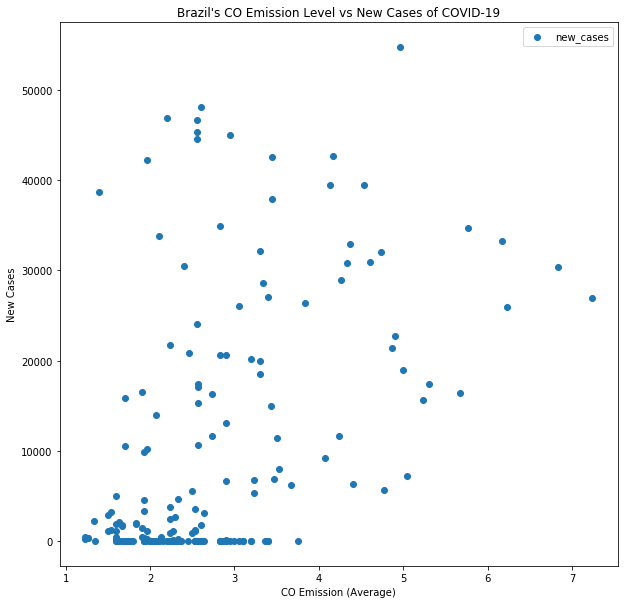

In [25]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_CO['median'],
        COVID_Testing_Data_CO['new_cases'])

# Set title and labels for axes
ax.set(xlabel="CO Emission (Average)",
       ylabel= 'New Cases',
       title="Brazil's CO Emission Level vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

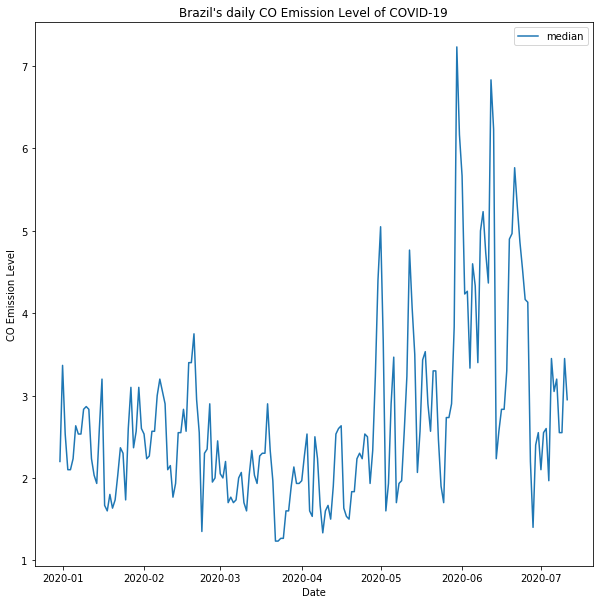

In [26]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(COVID_Testing_Data_CO['date'],
        COVID_Testing_Data_CO['median'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel= 'CO Emission Level',
       title="Brazil's daily CO Emission Level of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs NO2 emission

In [27]:
COVID_Testing_Data_NO2 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'no2']

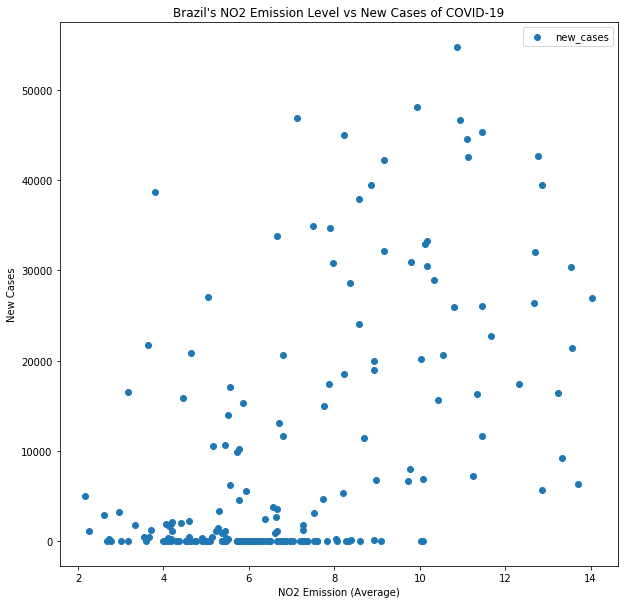

In [28]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_NO2['median'],
        COVID_Testing_Data_NO2['new_cases'])

# Set title and labels for axes
ax.set(xlabel="NO2 Emission (Average)",
       ylabel= 'New Cases',
       title="Brazil's NO2 Emission Level vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs O3 emission

In [29]:
COVID_Testing_Data_O3 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'o3']

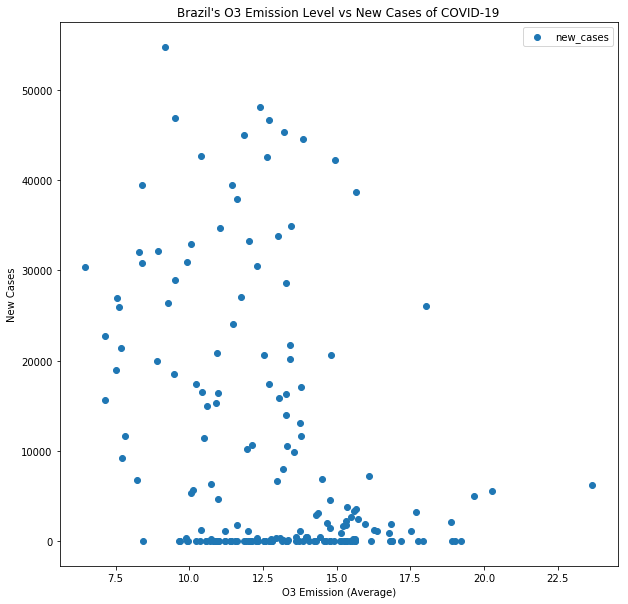

In [49]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_O3['median'],
        COVID_Testing_Data_O3['new_cases'])

# Set title and labels for axes
ax.set(xlabel="O3 Emission (Average)",
       ylabel= 'New Cases',
       title="Brazil's O3 Emission Level vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs SO2 emission

In [31]:
COVID_Testing_Data_SO2 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'so2']

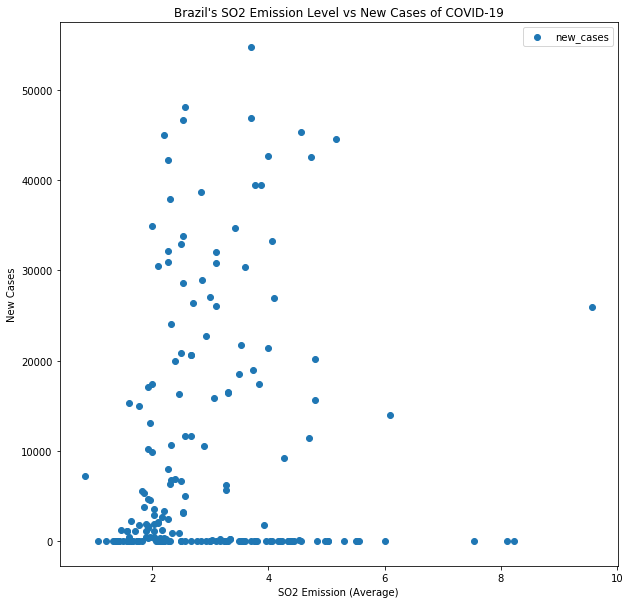

In [32]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_SO2['median'],
        COVID_Testing_Data_SO2['new_cases'])

# Set title and labels for axes
ax.set(xlabel="SO2 Emission (Average)",
       ylabel= 'New Cases',
       title="Brazil's SO2 Emission Level vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Temperature

In [33]:
COVID_Testing_Data_Temp = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'temperature']

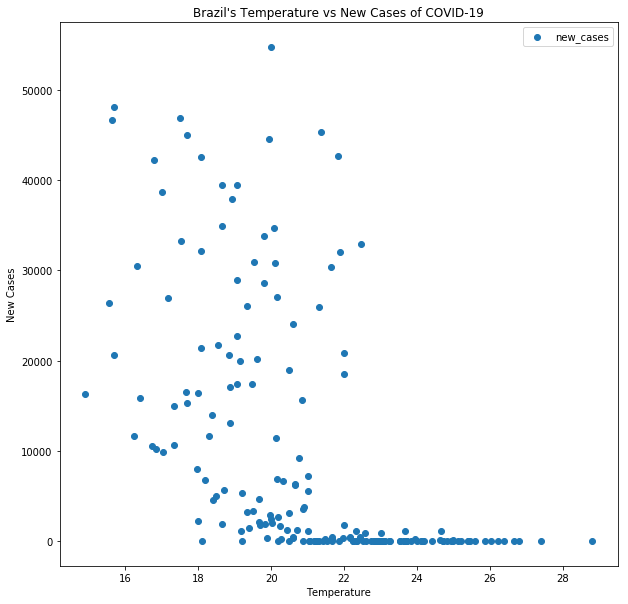

In [34]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Temp['median'],
        COVID_Testing_Data_Temp['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Temperature",
       ylabel= 'New Cases',
       title="Brazil's Temperature vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Humidity

In [35]:
COVID_Testing_Data_Hum = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'humidity']

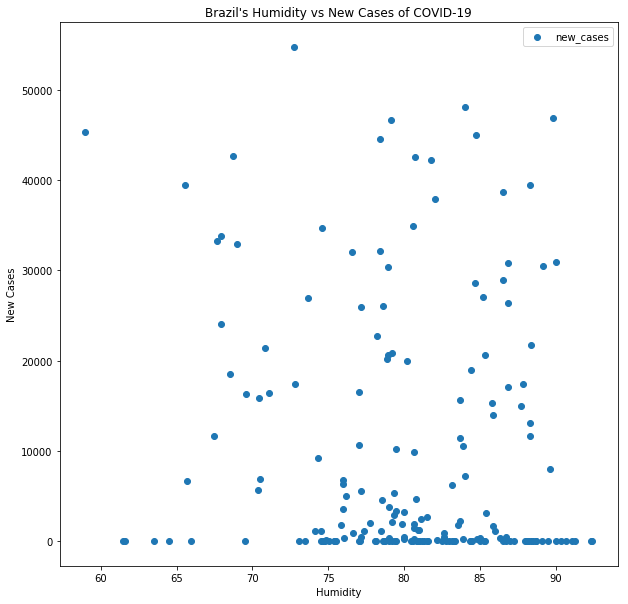

In [36]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Hum['median'],
        COVID_Testing_Data_Hum['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Humidity",
       ylabel= 'New Cases',
       title="Brazil's Humidity vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Dew Point

In [37]:
COVID_Testing_Data_Dew = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'dew']

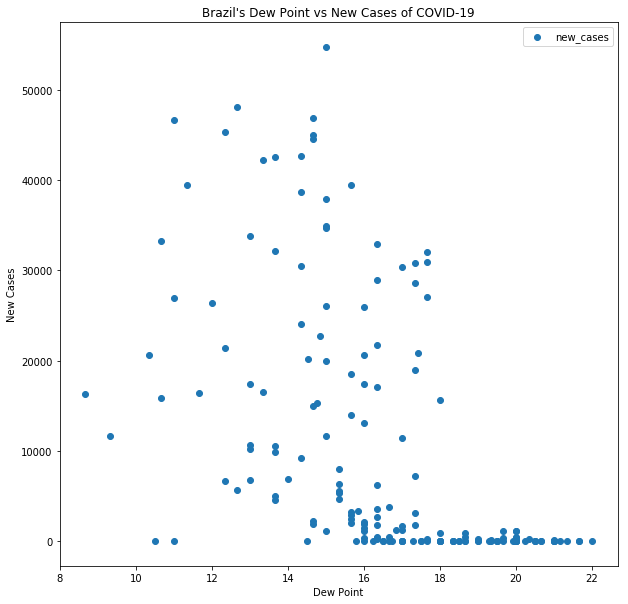

In [38]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Dew['median'],
        COVID_Testing_Data_Dew['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Dew Point",
       ylabel= 'New Cases',
       title="Brazil's Dew Point vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs PM10 particles

In [39]:
COVID_Testing_Data_PM10 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'pm10']

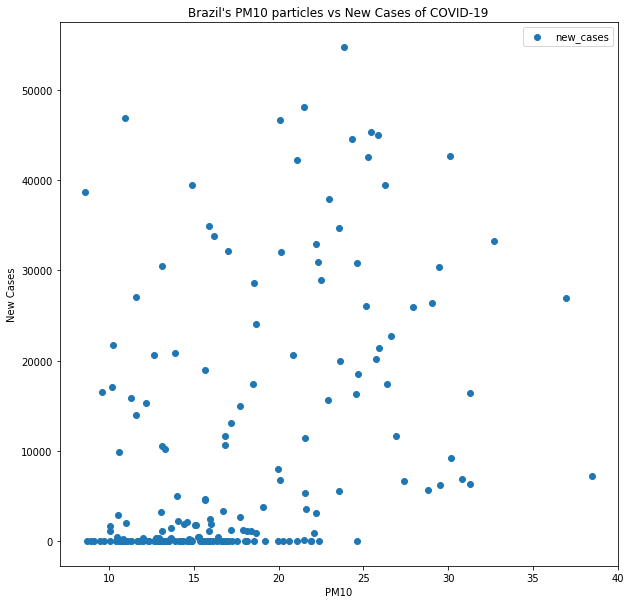

In [40]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_PM10['median'],
        COVID_Testing_Data_PM10['new_cases'])

# Set title and labels for axes
ax.set(xlabel="PM10",
       ylabel= 'New Cases',
       title="Brazil's PM10 particles vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs PM2.5 particles

In [41]:
COVID_Testing_Data_PM25 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'pm25']

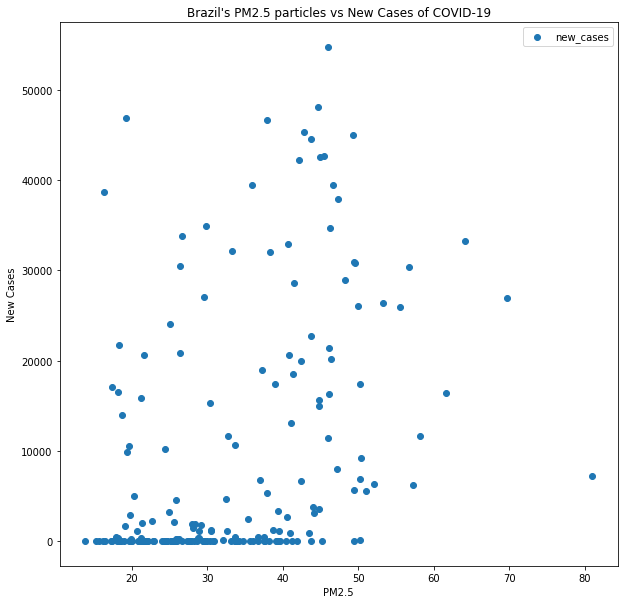

In [50]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_PM25['median'],
        COVID_Testing_Data_PM25['new_cases'])

# Set title and labels for axes
ax.set(xlabel="PM2.5",
       ylabel= 'New Cases',
       title="Brazil's PM2.5 particles vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Atmospheric Pressure

In [43]:
COVID_Testing_Data_Pressure = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'pressure']

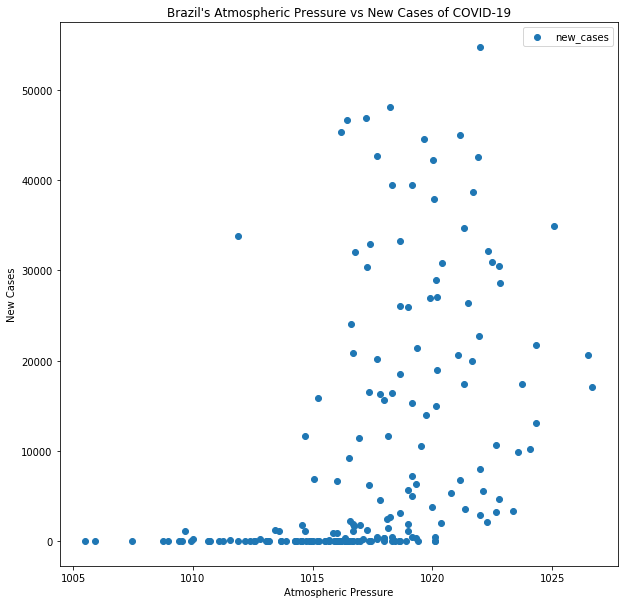

In [44]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Pressure['median'],
        COVID_Testing_Data_Pressure['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Atmospheric Pressure",
       ylabel= 'New Cases',
       title="Brazil's Atmospheric Pressure vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Wind Gust

In [45]:
COVID_Testing_Data_Wind_Gust = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'].isin(['wind-gust', 'wind gust'])]

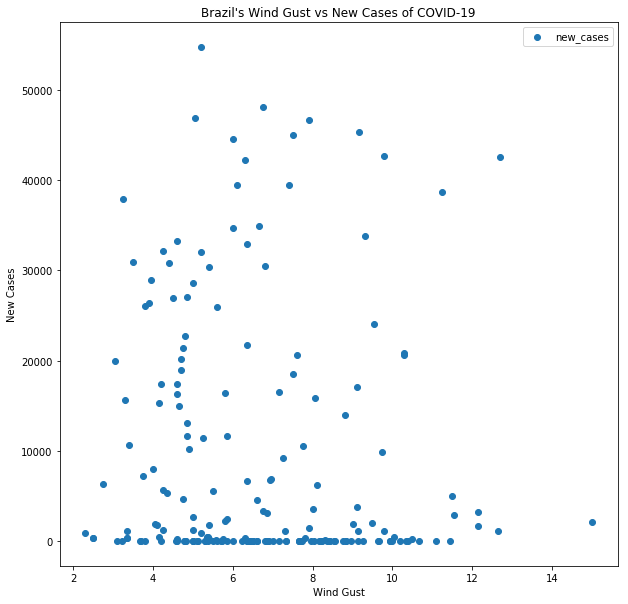

In [46]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Wind_Gust['median'],
        COVID_Testing_Data_Wind_Gust['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Wind Gust",
       ylabel= 'New Cases',
       title="Brazil's Wind Gust vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Wind Speed

In [47]:
COVID_Testing_Data_Wind_Speed = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'].isin(['wind-speed', 'wind speed'])]

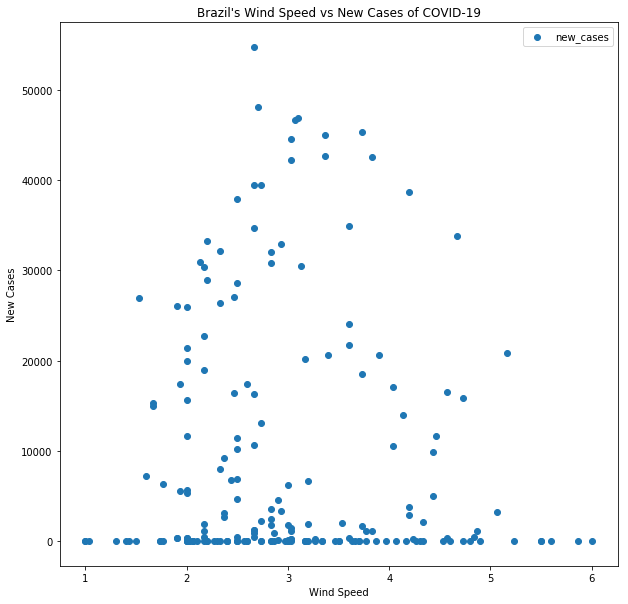

In [48]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Wind_Speed['median'],
        COVID_Testing_Data_Wind_Speed['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Wind Speed",
       ylabel= 'New Cases',
       title="Brazil's Wind Speed vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()